# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mn

# Load Data

In [2]:
breed_stats = pd.read_csv('./datasets/breeds_info_clean.csv')

In [3]:
breed_stats.head(3)

,breed,classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,border collie,brightest dogs,0.95,1.0,4.0,19.000000,21.000000,40.000000,40.000000
1,poodle,brightest dogs,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876
2,german shepherd,brightest dogs,0.95,1.0,4.0,22.000000,26.000000,75.000000,90.000000


List of all breeds

In [4]:
breeds = set(breed_stats['breed'])

In [5]:
shelter = pd.read_csv('./datasets/cleaned_data/texas_shelters_active.csv')

In [6]:
shelter.head(3)

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,age_out,sex,intact_in,intact_out,age,primary_color,secondary_color,breed_1,breed_2,pure
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,10.0,1,0,0,Senior,tricolor,tricolor,dachshund,dachshund,1.0
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,16.0,1,0,0,Senior,brown,white,shetland sheepdog,shetland sheepdog,1.0
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,15.0,0,0,0,Senior,black,white,labrador retriever,pit bull,NaN


In [7]:
shelter.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure'],
      dtype='object')

In [8]:
shelter.drop(columns=['id', 'color', 'dob', 'age_in', 'intact_in', 'location'])

,name,date_in,intake_type,condition,breed,date_out,outcome,age_out,sex,intact_out,age,primary_color,secondary_color,breed_1,breed_2,pure
0,Oreo,2014-04-02 15:55:00,surrender,normal,dachshund,2014-04-07 15:12:00,transfer,10.0,1,0,Senior,tricolor,tricolor,dachshund,dachshund,1.0
1,Bandit,2013-11-16 09:02:00,public_assist,injured,shetland sheepdog,2013-11-16 11:54:00,return_owner,16.0,1,0,Senior,brown,white,shetland sheepdog,shetland sheepdog,1.0
2,Bettie,2013-11-16 14:46:00,stray,aged,labrador retriever/pit bull,2013-11-17 11:40:00,return_owner,15.0,0,0,Senior,black,white,labrador retriever,pit bull,NaN
3,Sasha,2014-11-14 15:11:00,stray,normal,miniature schnauzer,2014-11-14 19:28:00,return_owner,15.0,0,1,Senior,black,gray,miniature schnauzer,miniature schnauzer,1.0
4,Pep,2014-09-15 11:28:00,stray,normal,lhasa apso,2014-09-15 16:35:00,return_owner,15.0,1,0,Senior,brown,white,lhasa apso,lhasa apso,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55377,Face,2022-02-08 11:06:00,public_assist,injured,pit bull,2022-02-08 18:16:00,return_owner,2.0,1,1,Adult,brown,brown,pit bull,pit bull,1.0
55378,Static,2022-02-08 11:06:00,public_assist,normal,pit bull,2022-02-08 18:19:00,return_owner,0.0,0,1,Baby,blue,white,pit bull,pit bull,1.0
55379,Rose,2022-02-08 11:54:00,surrender,sick,doberman pinscher,2022-02-08 14:32:00,euthanasia,2.0,0,0,Adult,black,black,doberman pinscher,doberman pinscher,1.0
55380,A851204,2022-02-08 14:11:00,stray,normal,dachshund,2022-02-10 12:39:00,return_owner,3.0,1,1,Adult,brown,brindle,dachshund,dachshund,1.0


In [9]:
shelter['pure'].fillna(0, inplace=True)

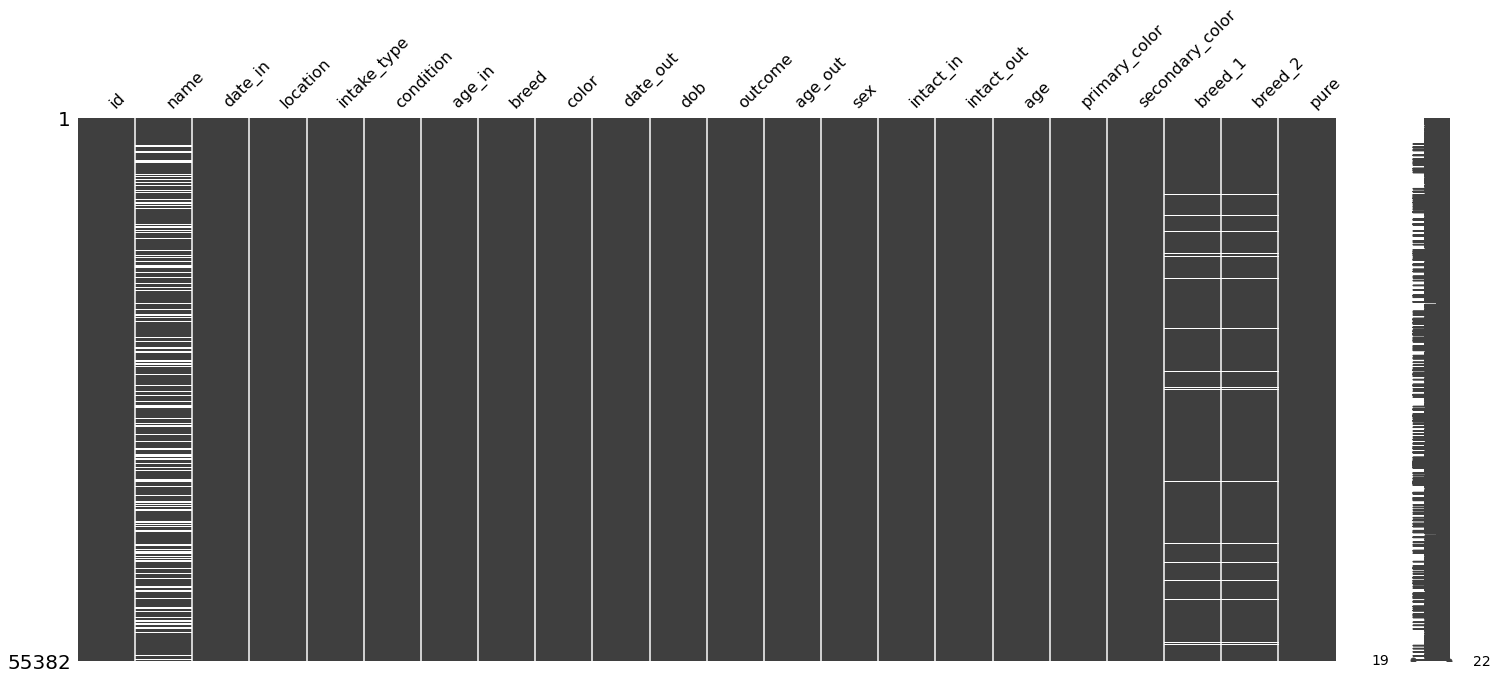

In [10]:
mn.matrix(shelter);

<AxesSubplot:>

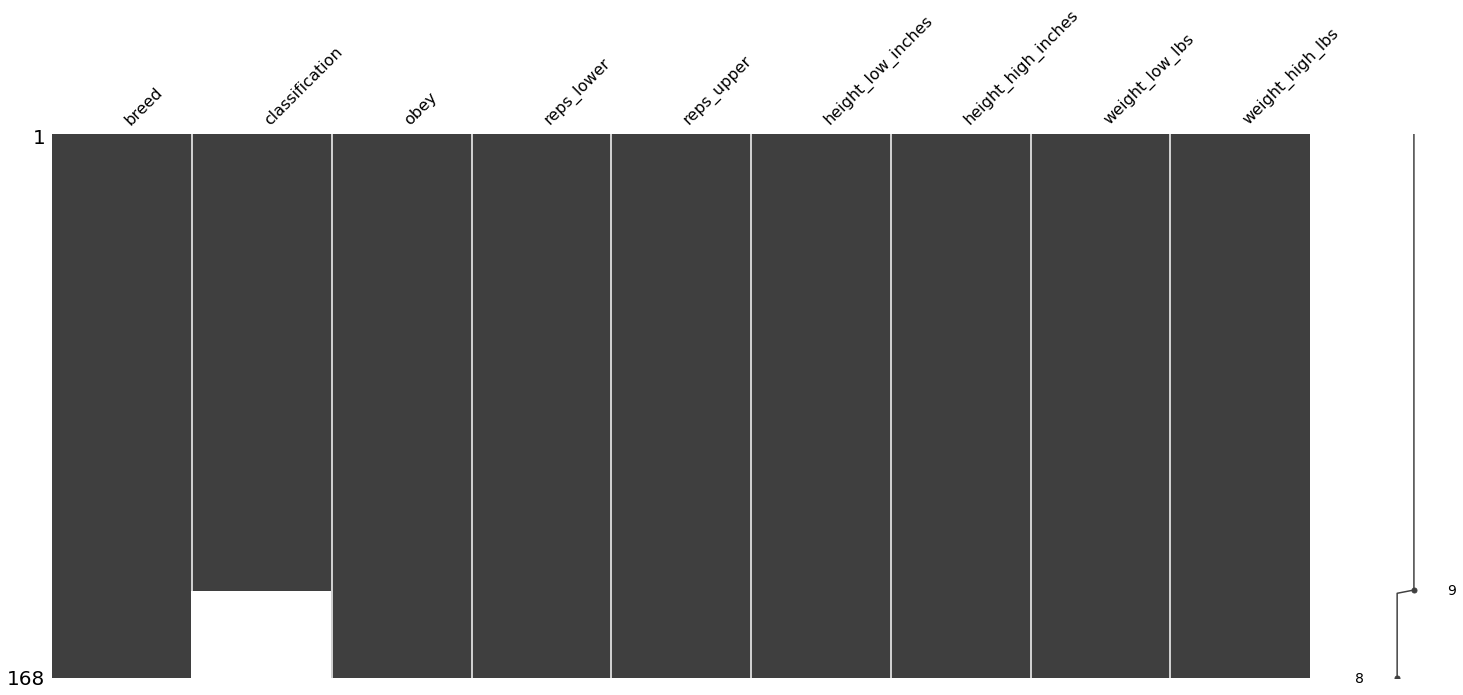

In [11]:
mn.matrix(breed_stats)

## Compile Breed stats into shelter data

Average stats to fill unknowns

In [12]:
mix = []                                                                        # storage
for c in breed_stats.drop(columns=['breed', 'classification']).columns:
    mix.append(breed_stats[c].mean())                                           # get mean stat
mix = zip(breed_stats.drop(columns=['breed', 'classification']).columns, mix)   # convert to df
mix = pd.DataFrame(mix).T
mix.columns = mix.iloc[0]                                                       # rename cols
mix = mix[1:].copy()                                                            # drop row containing column names
mix = mix.add_suffix('_b2')                                                     # add col name suffix
mix                                                                             # inspect

,obey_b2,reps_lower_b2,reps_upper_b2,height_low_inches_b2,height_high_inches_b2,weight_low_lbs_b2,weight_high_lbs_b2
1,0.569858,25.319149,41.028369,17.941176,20.908497,42.934641,57.522876


In [13]:
mix.squeeze()

0
obey_b2                   0.569858
reps_lower_b2            25.319149
reps_upper_b2            41.028369
height_low_inches_b2     17.941176
height_high_inches_b2    20.908497
weight_low_lbs_b2        42.934641
weight_high_lbs_b2       57.522876
Name: 1, dtype: object

In [14]:
shelter = shelter[shelter['breed_1'].notna()].copy(deep=True)       # drop dogs without a breed classification

In [15]:
def gen_breed_stats(x):
    
    d1 = breed_stats.drop(columns='classification').set_index('breed').loc[x['breed_1'],:]
    d1['breed_class'] = x['breed_1']
    
    if x['breed_2'] != 'mix':
        d2 = breed_stats.drop(columns='classification').set_index('breed').loc[x['breed_2'],:]
        d2['breed_class'] = x['breed_2']
    else:
        d2 = mix.squeeze()

    d1 = d1.add_suffix('_b1')   # data frame of breed_1
    d2 = d2.add_suffix('_b2')   # data frame of breed_2

    out = pd.concat([d1, d2])   # this line not working

    return out

In [16]:
# takes about 10 mins to run
comp_1 = shelter.apply(gen_breed_stats, axis=1)

In [17]:
comp_1.head(5)

,breed_class_b1,breed_class_b2,height_high_inches_b1,height_high_inches_b2,height_high_inches_b2_b2,height_low_inches_b1,height_low_inches_b2,height_low_inches_b2_b2,obey_b1,obey_b2,...,reps_lower_b2_b2,reps_upper_b1,reps_upper_b2,reps_upper_b2_b2,weight_high_lbs_b1,weight_high_lbs_b2,weight_high_lbs_b2_b2,weight_low_lbs_b1,weight_low_lbs_b2,weight_low_lbs_b2_b2
0,dachshund,dachshund,10.000000,10.000000,NaN,7.000000,7.000000,NaN,0.50,0.50,...,NaN,40.0,40.0,NaN,32.000000,32.000000,NaN,16.000000,16.000000,NaN
1,shetland sheepdog,shetland sheepdog,20.908497,20.908497,NaN,17.941176,17.941176,NaN,0.95,0.95,...,NaN,4.0,4.0,NaN,57.522876,57.522876,NaN,42.934641,42.934641,NaN
2,labrador retriever,pit bull,24.000000,19.000000,NaN,21.000000,17.000000,NaN,0.95,0.70,...,NaN,4.0,25.0,NaN,80.000000,50.000000,NaN,55.000000,40.000000,NaN
3,miniature schnauzer,miniature schnauzer,20.908497,20.908497,NaN,17.941176,17.941176,NaN,0.85,0.85,...,NaN,15.0,15.0,NaN,57.522876,57.522876,NaN,42.934641,42.934641,NaN
4,lhasa apso,lhasa apso,20.908497,20.908497,NaN,17.941176,17.941176,NaN,0.30,0.30,...,NaN,80.0,80.0,NaN,57.522876,57.522876,NaN,42.934641,42.934641,NaN


In [18]:
# averages stats between two breeds
def avg_breed_stats(df):
    # create empty dataframe
    new_df = pd.DataFrame()

    new_df['obey'] = (df['obey_b1'] + df['obey_b2']) / 2
    new_df['reps_lower'] = (df['reps_lower_b1'] + df['reps_lower_b2']) / 2
    new_df['reps_upper'] = (df['reps_upper_b1'] + df['reps_upper_b2']) / 2
    new_df['height_low_inches'] = (df['height_low_inches_b1'] + df['height_low_inches_b2']) / 2
    new_df['height_high_inches'] = (df['height_high_inches_b1'] + df['height_high_inches_b2']) / 2
    new_df['weight_low_lbs'] = (df['weight_low_lbs_b1'] + df['weight_low_lbs_b2']) / 2
    new_df['weight_high_lbs'] = (df['weight_high_lbs_b1'] + df['weight_high_lbs_b2']) / 2

    # returns averaged stats between the two breeds
    return new_df
    
all_stats = avg_breed_stats(comp_1)

In [19]:
all_stats.head()

,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000
1,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876
2,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000
3,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876
4,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876


In [20]:
all_stats.isna().sum()

obey                  710
reps_lower            710
reps_upper            710
height_low_inches     710
height_high_inches    710
weight_low_lbs        710
weight_high_lbs       710
dtype: int64

In [21]:
all_stats[all_stats['obey'].isna()]

,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
54573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54631,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# combines shelter dataframe and the stats for those dogs
shelter_with_stats = pd.concat([shelter, all_stats], axis=1)
shelter_with_stats.head(2)

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_1,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,dachshund,1.0,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,shetland sheepdog,1.0,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876


In [23]:
shelter_with_stats.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs'],
      dtype='object')

In [26]:
shelter_with_stats['date_in'] = pd.to_datetime(shelter_with_stats['date_in'])
shelter_with_stats['date_out'] = pd.to_datetime(shelter_with_stats['date_out'])

In [27]:
shelter_with_stats['time_in_shelter'] = shelter_with_stats['date_out'] - shelter_with_stats['date_in']

In [28]:
shelter_with_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53513 entries, 0 to 55381
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   id                  53513 non-null  object         
 1   name                41725 non-null  object         
 2   date_in             53513 non-null  datetime64[ns] 
 3   location            53513 non-null  object         
 4   intake_type         53512 non-null  object         
 5   condition           53504 non-null  object         
 6   age_in              53513 non-null  float64        
 7   breed               53513 non-null  object         
 8   color               53513 non-null  object         
 9   date_out            53513 non-null  datetime64[ns] 
 10  dob                 53513 non-null  object         
 11  outcome             53513 non-null  object         
 12  age_out             53513 non-null  float64        
 13  sex                 53513 non-n

In [29]:
shelter_with_stats['name'].fillna('unknown', inplace=True)

In [30]:
shelter_with_stats.isna().sum()

id                      0
name                    0
date_in                 0
location                0
intake_type             1
condition               9
age_in                  0
breed                   0
color                   0
date_out                0
dob                     0
outcome                 0
age_out                 0
sex                     0
intact_in               0
intact_out              0
age                     0
primary_color           0
secondary_color         0
breed_1                 0
breed_2                 0
pure                    0
obey                  710
reps_lower            710
reps_upper            710
height_low_inches     710
height_high_inches    710
weight_low_lbs        710
weight_high_lbs       710
time_in_shelter         0
dtype: int64

<AxesSubplot:>

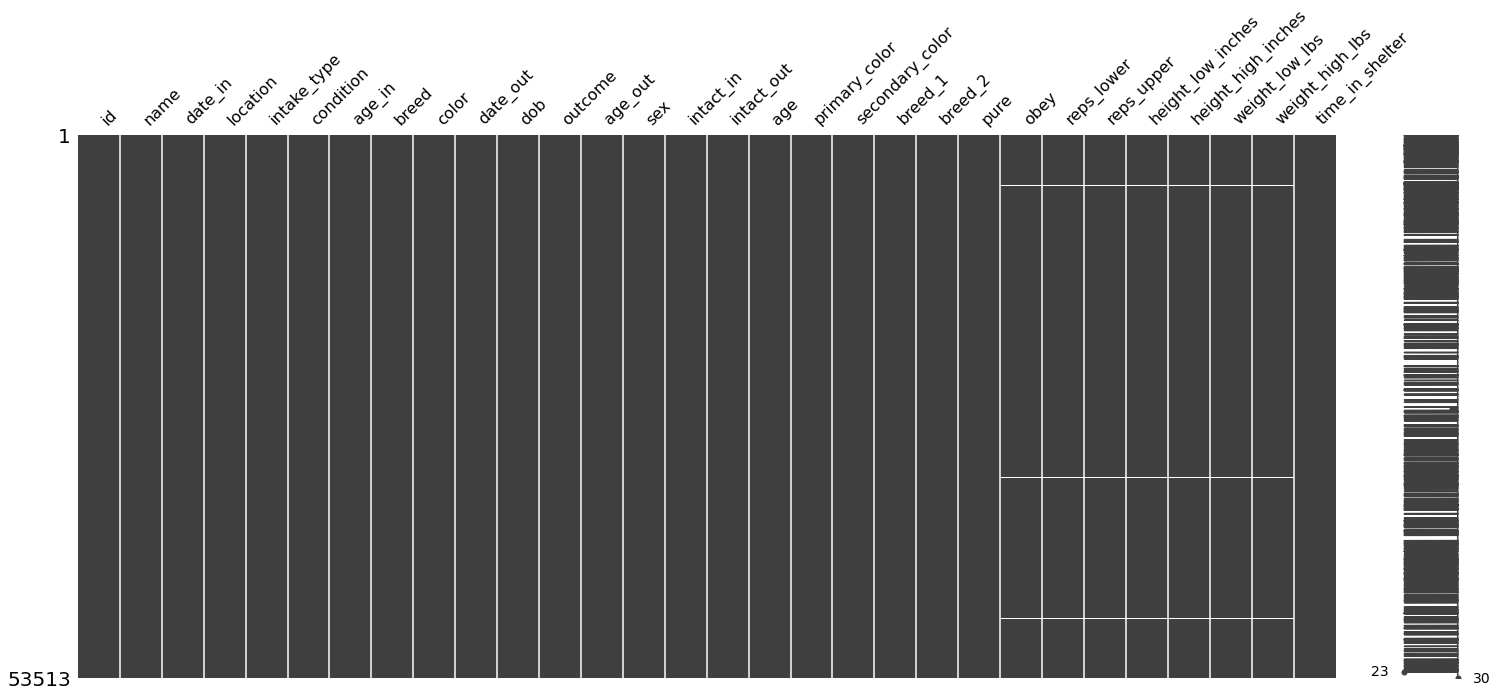

In [31]:
mn.matrix(shelter_with_stats)

In [32]:
shelter_with_stats.to_csv('./datasets/cleaned_data/shelters_with_stats.csv', index=False)